In [1]:
import numpy as np
from math import atan2, pi
import matplotlib.pyplot as plt
import json
import random

from fractions import Fraction

# Opening the polygon file

In [2]:
# path_to_testfile = "./instances_v2/instances/fpg-poly_0000000020_h1.instance.json"
# path_to_testfile = "./instances_v2/instances/socg60.instance.json"
# path_to_testfile = "../instances/fpg-poly_0000000020_h2.instance.json"

# path_to_testfile = "./instances-2IMA15/instances-2IMA15/ccheese142.instance.json" #NOT WORKING i = 54
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/ccheese4390.instance.json" #NOT WORKING i = 12
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/example_instance1.instance.json" #NOT WORKING i = 0
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/fpg-poly_0000000020_h1.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/fpg-poly_0000000020_h2.instance.json"
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/fpg-poly_0000004900_h2.instance.json"
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/maze_79_50_05_005.instance.json" #NOT WORKING i = 15
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/maze_4344_250_001_01.instance.json" #NOT WORKING i = 7
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/socg60.instance.json" # NOT WORKING i = 0 - HATE THIS ONE
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_iso_aligned_mc0000088.instance.json" # NOT WORKING i = 0
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_iso_aligned_mc0001336.instance.json" # NOT WORKING i = 1
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_iso_mc0000080.instance.json" #! ortholinear but not crashing
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_octa_mc0000082.instance.json" # NOT WORKING i = 1
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_octa_mc0000784.instance.json" # NOT WORKING i = 0
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_smo_mc0005962.instance.json"


with open(path_to_testfile) as testfile:
    polygon = json.load(testfile)

In [3]:
print(polygon['type'])
print(polygon['name'])
print(polygon['n'])
print(polygon['outer_boundary'])
print(polygon['holes'])
print(len(polygon['holes']))


CGSHOP2023_Instance
fpg-poly_0000000020_h2
29
[{'x': 191850806, 'y': 207276863}, {'x': 233102742, 'y': 118763799}, {'x': 409746058, 'y': 102221492}, {'x': 518170442, 'y': 145990133}, {'x': 658393154, 'y': 84033988}, {'x': 969944537, 'y': 312412941}, {'x': 1073741824, 'y': 27398453}, {'x': 1006306257, 'y': 249250792}, {'x': 972122497, 'y': 406678785}, {'x': 841172557, 'y': 554365113}, {'x': 602711995, 'y': 719961446}, {'x': 498647195, 'y': 529671996}, {'x': 385673579, 'y': 956170210}, {'x': 286048011, 'y': 834661731}, {'x': 119059789, 'y': 817096511}, {'x': 101820302, 'y': 714800549}, {'x': 43085140, 'y': 404568818}, {'x': 18786073, 'y': 316887810}, {'x': 0, 'y': 194728036}, {'x': 142609572, 'y': 0}]
[[{'x': 349623949, 'y': 227499932}, {'x': 359939980, 'y': 768422084}, {'x': 378607327, 'y': 267682836}], [{'x': 68249156, 'y': 418481519}, {'x': 178867385, 'y': 723985109}, {'x': 345167289, 'y': 859001776}, {'x': 278159008, 'y': 298820764}, {'x': 274224193, 'y': 136143764}, {'x': 252289409,

### Plotting the polygon

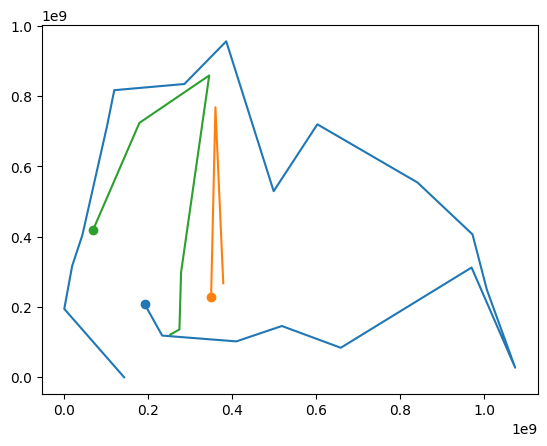

In [4]:
listpolygon = []
for pt in polygon['outer_boundary']:
    listpolygon.append([pt['x'], pt['y']])

listpolygon = np.array(listpolygon)

plt.plot(listpolygon.T[0], listpolygon.T[1])
# plt.scatter(listpolygon.T[0][1:], listpolygon.T[1][1:])
plt.scatter(listpolygon[0][0], listpolygon[0][1])

for hole in polygon['holes']:
    listhole = []
    for pt in hole:
        listhole.append([pt['x'], pt['y']])
    
    listhole = np.array(listhole)

    plt.plot(listhole.T[0], listhole.T[1])
    # plt.scatter(listhole.T[0][1:], listhole.T[1][1:])
    plt.scatter(listhole[0][0], listhole[0][1])

plt.show()


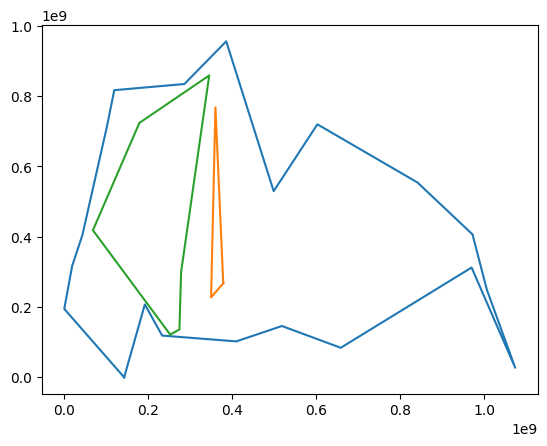

In [5]:
def polygon_plt():
    listpolygon = [[polygon['outer_boundary'][-1]['x'],polygon['outer_boundary'][-1]['y']]]
    for pt in polygon['outer_boundary']:
        listpolygon.append([pt['x'], pt['y']])

    listpolygon = np.array(listpolygon)

    plt.plot(listpolygon.T[0], listpolygon.T[1])

    for hole in polygon['holes']:
        listhole = [[hole[-1]['x'], hole[-1]['y']]]
        for pt in hole:
            listhole.append([pt['x'], pt['y']])
        
        listhole = np.array(listhole)

        plt.plot(listhole.T[0], listhole.T[1])
    
polygon_plt()
plt.show()

# Polygon & helper classes

In [6]:
class Point:
    def __init__(self, x, y, parent, incoming, outgoing):
        self.coordinate = (x,y)
        self.parent = parent
        self.incoming = incoming
        self.outgoing = outgoing

#In case we still want a point class with only 1 list we can use this
class Point1List:
    def __init__(self, x, y, parent, adjacent):
        self.coordinate = (x,y)
        self.parent = parent
        self.adjacent = adjacent
        
class Edge:
    def __init__(self, pt1, pt2, parent):
        self.pt1 = pt1
        self.pt2 = pt2
        self.parent = parent

class Polygon:
    def __init__(self, isHole, points, edges, holes):
        self.isHole = isHole
        self.points = points
        self.edges = edges
        self.holes = holes

    def setholes(self, holes_new):
        self.holes = holes_new


### Turning polygon dictionary from file into Polygon class

In [7]:
#Creating outer boundary pts, edges, polygon
listpts = []
listpolygons = []
listedges = []
alledges = []
#allpoints = []

#Create points + Edges
for pt in polygon['outer_boundary']:
    (x,y) = [pt['x'], pt['y']]
    #p = Point1List(x,y, None, [])
    p = Point(x,y, None, [], [])
    #print(p.coordinate[0], p.coordinate[1])
    listpts.append(p)

counter = 0
for pt in listpts:
    e = Edge(listpts[counter-1], listpts[counter], None)
    listedges.append(e)
    alledges.append(e)
    counter +=1

#Update adjacent edges
z = len(listpts)
for i in range(z):
    #listpts[i].adjacent.append(listedges[i-1])
    listpts[i].incoming.append(listedges[i])
    if i < z-1:
        #listpts[i].adjacent.append(listedges[i+1])
        listpts[i].outgoing.append(listedges[i+1])
    else:
        listpts[i].outgoing.append(listedges[0])
        #listpts[i].adjacent.append(listedges[0])

#allpoints = listpts

#Create polygon and update parent of points/vertices to be this polygon
poly = Polygon(0, listpts, listedges, [])
for edges in poly.edges:
    edges.parent = poly #Update edges parent
for pts in poly.points:
    pts.parent = poly #Update point parent

#Print checks to get items
#for element in poly.points:
#    print(element.coordinate, element.parent, (element.incoming[0].pt1, element.incoming[0].pt2), (element.outgoing[0].pt1, element.outgoing[0].pt2))

print("Basic (Outside) polygon has now", len(poly.edges), "Edges and", len(poly.points), "Points")


Basic (Outside) polygon has now 20 Edges and 20 Points


In [8]:
#Do the same for holes
counter = 0
if len(polygon['holes']) == 0:
    ishole = 0
else:
    ishole = 1

#If we have holes, we are allowed to do this part    
if ishole:

    length_holes = len(polygon['holes'])
    listholepolygons = []
    
    #We might get multiple holes, so 1 list per hole for the edges and points of a hole
    for ctr in range(length_holes):
        listholeedges = []
        listholepts = []
        
        #Points in hole
        length = len(polygon['holes'][ctr])
        for n in range(length):
            (xh,yh) = (polygon['holes'][ctr][n]['x'], polygon['holes'][ctr][n]['y'])
            #print((xh,yh))
            #p = Point1List(xh,yh, None, [])
            p = Point(xh,yh, None, [], [])
            listholepts.append(p)
        
        #Edges in hole
        counter = 0
        for pt in listholepts:
            e = Edge(listholepts[counter-1], listholepts[counter], None)
            #print("EDGE Added:", e.pt1, e.pt2)
            listholeedges.append(e)
            alledges.append(e)
            counter +=1

        #adjacent edges of a point
        z = len(listholepts)
        for i in range(z):
            #listholepts[i].adjacent.append(listholeedges[i])
            listholepts[i].incoming.append(listholeedges[i])
            if i < z-1:
                #listholepts[i].adjacent.append(listholeedges[i+1])
                listholepts[i].outgoing.append(listholeedges[i+1])
            else:
                listholepts[i].outgoing.append(listholeedges[0])
                #listholepts[i].adjacent.append(listedges[0])
              
        counter = 0
        h = Polygon(1, listholepts, listholeedges, [])
        #Update all edges and points to make sure that the parent is set to this hole
        for edges in h.edges:
            edges.parent = h #Update edges parent
        for pts in h.points:
            pts.parent = h #Update point parent
            #allpoints.append(pts)

        #append hole to list
        listholepolygons.append(h)
        
    #add all holes we created in the main polygon
    poly.setholes(listholepolygons)
    #print(len(poly.holes))

    print("Updated (Outside + Holes) polygon has now", len(poly.edges), "Edges and", len(poly.points), "Points, Including", len(poly.holes), "Holes")
    #for element in poly.points:
    #    print(element.coordinate, element.parent, (element.incoming[0].pt1, element.incoming[0].pt2), (element.outgoing[0].pt1, element.outgoing[0].pt2))
    for holex in poly.holes:
        for pt in holex.points:
            print(pt.coordinate)
    #for elem in range(len(alledges)):
    #    print(alledges[elem].pt1, alledges[elem].pt2)

Updated (Outside + Holes) polygon has now 20 Edges and 20 Points, Including 2 Holes
(349623949, 227499932)
(359939980, 768422084)
(378607327, 267682836)
(68249156, 418481519)
(178867385, 723985109)
(345167289, 859001776)
(278159008, 298820764)
(274224193, 136143764)
(252289409, 121547145)


# Useful functions

### Orientation variants

In [9]:
#returns the orientation of p3 wrt line through p1 and p2
def orientation(p1, p2, p3):

    #vector from p1 to p2
    a = [(int(p2['x']) - int(p1['x'])), (int(p2['y']) - int(p1['y']))]
    #vector from p1 to p3
    b = [(int(p3['x']) - int(p1['x'])), (int(p3['y']) - int(p1['y']))]

    #cross product
    cross = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])

    if cross == 0: #colinear
        return 0
    else: #sign gives left or right of \bar{p1p2}
        return np.sign(cross)

In [10]:
#returns the orientation of p3 wrt line through p1 and p2
def orientation_class(p1, p2, p3):

    #vector from p1 to p2
    a = [(int(p2.coordinate[0]) - int(p1.coordinate[0])), (int(p2.coordinate[1]) - int(p1.coordinate[1]))]
    #vector from p1 to p3
    b = [(int(p3.coordinate[0]) - int(p1.coordinate[0])), (int(p3.coordinate[1]) - int(p1.coordinate[1]))]

    #cross product
    cross = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])

    if cross == 0: #colinear
        return 0, cross
    else: #sign gives left or right of \bar{p1p2}
        return np.sign(cross), cross

In [11]:
#returns the orientation as sign and its exact value (needed for sorting) of p3 wrt line through p1 and p2 using the coordinates only
def orientation_coordinates(p1, p2, p3):
    #vector from p1 to p2
    a = [(int(p2[0]) - int(p1[0])), (int(p2[1]) - int(p1[1]))]
    #vector from p1 to p3
    b = [(int(p3[0]) - int(p1[0])), (int(p3[1]) - int(p1[1]))]

    #cross product
    cross = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])
    val = cross

    if cross == 0: #colinear
        return 0, val
    else: #sign gives left or right of \bar{p1p2} and the exact value
        return np.sign(cross), val

### Finding reflex vertices

In [12]:
def find_reflex(polygon):
    n = polygon['n']
    bdry = polygon['outer_boundary']
    holes = polygon['holes']
    count = 0
    reflex = []

    for i in range(len(bdry)):
        if orientation(bdry[(i-1)], bdry[i], bdry[(i+1) % len(bdry)]) == -1: reflex.append(bdry[i]); count += 1

    for hole in holes:
        for i in range(len(hole)):
            if orientation(hole[(i-1)], hole[i], hole[(i+1) % len(hole)]) == -1: reflex.append(hole[i]); count += 1

    return reflex, count

In [13]:
def find_reflex_in_class(polygon):
    bdry = polygon.points
    holes = polygon.holes
    count = 0
    reflex = []

    for i in range(len(bdry)):
        if orientation_class(bdry[(i-1)], bdry[i], bdry[(i+1) % len(bdry)])[0] == -1: 
            reflex.append(bdry[i]); count += 1
    
    print("We found", len(reflex), "Reflex points in our outer boundary of the polygon")
    for hole in holes:
        for i in range(len(hole.points)):
            if orientation_class(hole.points[(i-1)], hole.points[i], hole.points[(i+1) % len(hole.points)])[0] == -1: 
                reflex.append(hole.points[i]); count += 1

    return reflex, count

refl, nr = find_reflex_in_class(poly)
print("We found", nr, "reflex vertices in the polygon (including its holes)")
#for i in refl:
#    print(i.coordinate, i.incoming[0].pt1, i.incoming[0].pt2, i.outgoing[0].pt1, i.outgoing[0].pt2)

We found 8 Reflex points in our outer boundary of the polygon
We found 16 reflex vertices in the polygon (including its holes)


### Plotting reflex vertices 

In [14]:
reflex, r = find_reflex(polygon)

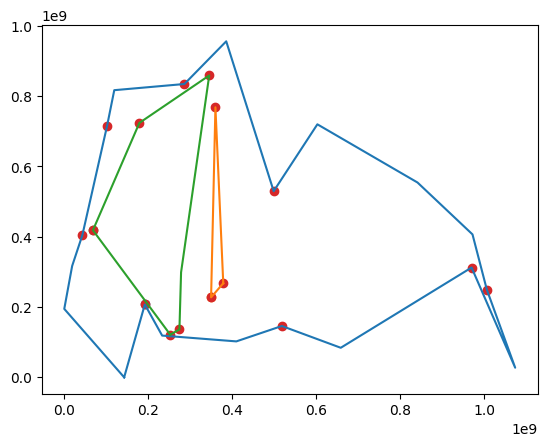

In [15]:
listpolygon = [[polygon['outer_boundary'][-1]['x'], polygon['outer_boundary'][-1]['y']]]
for pt in polygon['outer_boundary']:
    listpolygon.append([pt['x'], pt['y']])

listpolygon = np.array(listpolygon)

plt.plot(listpolygon.T[0], listpolygon.T[1])
# plt.scatter(listpolygon.T[0][1:], listpolygon.T[1][1:])
plt.scatter(listpolygon[1][0], listpolygon[1][1])

for hole in polygon['holes']:
    listhole = [[hole[-1]['x'], hole[-1]['y']]]
    for pt in hole:
        listhole.append([pt['x'], pt['y']])
    
    listhole = np.array(listhole)

    plt.plot(listhole.T[0], listhole.T[1])
    # plt.scatter(listhole.T[0][1:], listhole.T[1][1:])
    plt.scatter(listhole[1][0], listhole[1][1])

listreflex = []
for pt in reflex:
    listreflex.append([pt['x'], pt['y']])

listreflex = np.array(listreflex)

plt.scatter(listreflex.T[0], listreflex.T[1])

plt.show()

### Angle between 3 points

In [16]:
def angle(p1: Point, p2: Point, p3: Point):
    # Ax, Ay = p1.coordinate[0] - p2.coordinate[0], p1.coordinate[1] - p2.coordinate[1]
    # Cx, Cy = p3.coordinate[0] - p2.coordinate[0], p3.coordinate[1] - p2.coordinate[1]
    Ax, Ay = p3.coordinate[0] - p2.coordinate[0], p3.coordinate[1] - p2.coordinate[1]
    Cx, Cy = p1.coordinate[0] - p2.coordinate[0], p1.coordinate[1] - p2.coordinate[1]

    a = atan2(Ay, Ax)
    c = atan2(Cy, Cx)
    if a < 0: a += pi*2
    if c < 0: c += pi*2
    return (pi*2 + c - a) if a > c else (c - a) 

### Misc

In [17]:
def dist(p: Point, q: Point):
    return Fraction((Fraction(p.coordinate[0] - q.coordinate[0])**Fraction(2,1) + Fraction(p.coordinate[1] - q.coordinate[1])**Fraction(2,1)))#**Fraction(1,2))

In [18]:
a = Point(Fraction(3, 2), Fraction(0, 1), *[None]*3)
b = Point(Fraction(6, 2), Fraction(0, 1), *[None]*3)

dist(a,b)

Fraction(9, 4)

In [19]:
def intersection_point_error(l1: Edge, l2: Edge):
    # get the slopes from the lines defined by the endpoints of the edge
    slope1 = (l1.pt2.coordinate[1] - l1.pt1.coordinate[1]) / (l1.pt2.coordinate[0] - l1.pt1.coordinate[0])
    slope2 = (l2.pt2.coordinate[1] - l2.pt1.coordinate[1]) / (l2.pt2.coordinate[0] - l2.pt1.coordinate[0])

    # find the y-intercepts
    y_in1 = l1.pt1.coordinate[1] - slope1 * l1.pt1.coordinate[0]
    y_in2 = l2.pt1.coordinate[1] - slope1 * l2.pt1.coordinate[0]

    # mx+b-y=0 ->
    # m1x + b1 - y = m2x + b2 - y ->
    # add y both sides and solve for x
    x = (y_in2 - y_in1) / (slope1 - slope2)
    # substitute x in equation for one of the lines
    y = slope1 * x + y_in1

    return Point(x, y, None, [], [])


In [20]:
# Computes the intersection point of two lines each defined by two Points
# achieved with line equations
# def intersection_point(l1: Edge, l2: Edge):
#     dy1 = l1.pt2.coordinate[1] - l1.pt1.coordinate[1]
#     dx1 = l1.pt2.coordinate[0] - l1.pt1.coordinate[0]
#     # slope1 = dy1 / dx1

#     dy2 = l2.pt2.coordinate[1] - l2.pt1.coordinate[1]
#     dx2 = l2.pt2.coordinate[0] - l2.pt1.coordinate[0]
#     # slope2 = dy2 / dx2
    
#     # points on the lines that will be used to find intercepts
#     pt2 = l1.pt2
#     pt4 = l2.pt2

#     # y-intercepts
#     b1num = pt2.coordinate[1] * dx1 - pt2.coordinate[0] * dy1
#     b1den = dx1

#     b2num = pt4.coordinate[1] * dx2 - pt4.coordinate[0] * dy2
#     b2den = dx2

#     # the x-coordinate of the intersection point
#     xnum = (b2num * b1den - b1num * b2den)
#     xden = dy1 * dx2 - dy2 * dx1

#     # the y-coordinate of the intersection point
#     ynum = dy1 * xnum + b1num * xden
#     yden = dx1 * xden

#     return Point(Fraction(xnum, xden), Fraction(ynum, yden), *[None]*3), Point((xnum / xden),(ynum / yden), *[None]*3)

In [21]:
# Computes the intersection point of two lines each defined by two Points
# achieved with line equations
def intersection_point(l1: Edge, l2: Edge):
    dy1 = l1.pt2.coordinate[1] - l1.pt1.coordinate[1]
    dx1 = l1.pt2.coordinate[0] - l1.pt1.coordinate[0]
    # slope1 = dy1 / dx1

    dy2 = l2.pt2.coordinate[1] - l2.pt1.coordinate[1]
    dx2 = l2.pt2.coordinate[0] - l2.pt1.coordinate[0]
    # slope2 = dy2 / dx2

    xnum,xden,ynum,yden = [-1]*4

    if dx1 == 0 and dx2 != 0:
        xnum = l1.pt1.coordinate[0]
        xden = 1

        pt4 = l2.pt2
        
        b2num = pt4.coordinate[1] * dx2 - pt4.coordinate[0] * dy2
        b2den = dx2

        ynum = dy2 * xnum + b2num * xden
        yden = dx2 * xden

    elif dx2 == 0 and dx1 != 0:
        xnum = l2.pt1.coordinate[0]
        xden = 1

        pt2 = l1.pt2
        b1num = pt2.coordinate[1] * dx1 - pt2.coordinate[0] * dy1
        b1den = dx1

        ynum = dy1 * xnum + b1num * xden
        yden = dx1 * xden

    elif dx1 == 0 and dx2 == 0:
        if l1.pt1.coordinate[0] != l2.pt1.coordinate[0]:
            return None, None
        
        y1 = l1.pt1.coordinate[1]
        return (l2.pt1, l2.pt1) if abs(l2.pt1.coordinate[1] - y1) <= abs(l2.pt2.coordinate[1] - y1) else (l2.pt2, l2.pt2)
    else:
        # points on the lines that will be used to find intercepts
        pt2 = l1.pt2
        pt4 = l2.pt2

        # y-intercepts
        b1num = pt2.coordinate[1] * dx1 - pt2.coordinate[0] * dy1
        b1den = dx1

        b2num = pt4.coordinate[1] * dx2 - pt4.coordinate[0] * dy2
        b2den = dx2

        if dy1 == 0 and dy2 == 0:
            if l1.pt1.coordinate[1] != l2.pt1.coordinate[1]:
                return None, None
            
            x1 = l1.pt1.coordinate[0]
            return (l2.pt1, l2.pt1) if abs(l2.pt1.coordinate[0] - x1) <= (l2.pt2.coordinate[0] - x1) else (l2.pt2, l2.pt2)

        elif dy1 == 0 and dy2 != 0:
            y1 = l1.pt1.coordinate[1]
            
            xnum = y1 - Fraction(b2num, b2den)
            xden = Fraction(dy2, dx2)

            ynum = dy2 * xnum + b2num * xden
            yden = dx2 * xden
        elif dy2 == 0 and dy1 != 0:
            y2 = l2.pt1.coordinate[1]
            
            xnum = y2 - Fraction(b1num, b1den)
            xden = Fraction(dy1, dx1)

            ynum = dy1 * xnum + b1num * xden
            yden = dx1 * xden
        else:
            # the x-coordinate of the intersection point
            xnum = (b2num * b1den - b1num * b2den)
            xden = dy1 * dx2 - dy2 * dx1

            # the y-coordinate of the intersection point
            ynum = dy1 * xnum + b1num * xden
            yden = dx1 * xden

    return Point(Fraction(xnum, xden), Fraction(ynum, yden), l1.parent, [], []), Point((xnum / xden),(ynum / yden), l1.parent, [], [])

In [22]:
x1 = Point(57, 39, *[None]*3)
x2 = Point(2, 2, *[None]*3)
l1 = Edge(x1,x2,None)

x3 = Point(4, 1, *[None]*3)
x4 = Point(3, 44, *[None]*3)
l2 = Edge(x3, x4, None)

print(intersection_point_error(l1,l2).coordinate)

print(intersection_point(l1, l2)[0].coordinate)
print(intersection_point(l1, l2)[1].coordinate)

(-0.05370524562864283, 0.6184164711225509)
(Fraction(9479, 2402), Fraction(7949, 2402))
(3.9462947543713573, 3.30932556203164)


In [23]:
def pointequals(p1: Point, p2: Point) -> bool:
    return p1.coordinate[0] == p2.coordinate[0] and p1.coordinate[1] == p2.coordinate[1]

In [24]:
def other(e: Edge, p: Point) -> Point:
    return e.pt1 if pointequals(p, e.pt2) else e.pt2

# Sweep algorithm

### Event queue initialization

In [25]:
# #Add all points of polygon outer boundary and holes together to loop over all points to decide with orientation test which are in region of sweep
# allpoints = []
# for element in poly.points:
#     allpoints.append(element)
# for elements in poly.holes:
#     for pts in elements.points:
#         allpoints.append(pts)

# eventqueue_per_reflex = []
# for i in range(nr):
#     in_queue_of_reflex = []
#     to_list = []
#     for ap in allpoints:
#         # res = orientation_coordinates(refl[i].incoming[0].pt2, refl[i].coordinate, ap.coordinate)
#         # res2 = orientation_coordinates(refl[i].outgoing[0].pt1, refl[i].coordinate, ap.coordinate)
#         res = orientation_class(refl[i].incoming[0].pt2, refl[i], ap)
#         res2 = orientation_class(refl[i].outgoing[0].pt1, refl[i], ap)
#         if (res[0] == -1 and res2[0] == -1):
#             in_queue_of_reflex.append((ap, res[1])) #only if the point is inside the "wedge" of the extended incoming and outgoing edges it is in the eventqueue
#     #print(in_queue_of_reflex)
#     in_queue_of_reflex.sort(reverse=True, key=lambda v: v[1]) #We sort on descending order on the real value of the orientation test, not the -1/1 value
#     #print(in_queue_of_reflex)
#     for item in in_queue_of_reflex:
#         to_list.append(item[0])
#     eventqueue_per_reflex.append(to_list)
# print("We have", len(eventqueue_per_reflex), "eventqueues initialized, each sorted descending on value of the orientation test")
# #print(eventqueue_per_reflex[1])
# #for el in eventqueue_per_reflex[1]:
# #    print(el.coordinate)
# print("To reach the belonging eventqueue: Use eventqueue_per_reflex[i] with i the index of the belonging queue we have. Use .coordinate to retrieve its point value")

### Status initialization

In [26]:
def status(v, polygon):
    pts = []
    edges = []
    status = []
    #get vertices of the boundary, and check if the reflex vertex is on the boundary
    for pt in range(len(polygon['outer_boundary'])):
        if (polygon['outer_boundary'][pt] == v):
            incoming = polygon['outer_boundary'][pt - 1]
        (x,y) = [polygon['outer_boundary'][pt]['x'], polygon['outer_boundary'][pt]['y']]
        p = Point(x,y, None, None, None)
        pts.append(p)
    #do the same for the holes
    for hole in polygon['holes']:
        for i in range(len(hole)):
            if (polygon['holes'][hole][i] == v):
                incoming = polygon['holes'][hole][i - 1]
            (x,y) = [polygon['holes'][hole][i]['x'], polygon['holes'][hole][i]['y']]
            p = Point(x, y, None, None, None)
            pts.append(p)
    #create the edges out of the vertices
    for i in range(len(pts)):
        e = Edge(pts[i].coordinate, pts[i-1].coordinate, None)
        edges.append(e)
    
    #make v into a point class
    r = Point(v['x'], v['y'], None, None, None)
    #make the incoming point into a point class
    incoming = Point(incoming['x'], incoming['y'], None, None, None)
    #find all the edges that intersect the infinite line through incoming and r
    for i in range(len(edges)):
        p1 = Point(edges[i].pt1[0], edges[i].pt1[1], None, None, None)
        p2 = Point(edges[i].pt2[0], edges[i].pt2[1], None, None, None)
        if orientation_class(incoming, r, p1) != orientation_class(incoming, r, p2):
            status.append(edges[i])

    return status

### Event handling

In [27]:
# There is only one type of event.
# We need to remove edges that "end" (not in terms of the direction of the edge)
# in this Point from the status, and add the edges that "start" here.
# We want to report the Points of the polygon that are endpoints of an edge that is visible to r
def handle_event(p: Point, r: Point, status):
    d = dist(p,r) #is it needed?

    # print(status)
    reportThis = False
    
    toBeAdded = []

    edges, dists = zip(*status) # list of pairs (edge, dist) to two lists of edges and dists
    edges = list(edges)

    if (pointequals(edges[0].pt1, p) or pointequals(edges[0].pt2, p)):
        reportThis = True

    for edge in (p.incoming + p.outgoing): # all edges ending or starting here
        try:
            idx = edges.index(edge) #finds the index of 'edge' in 'edges' if it exists, may throw error

            del edges[idx]
            del status[idx]
        except: #edge is not in edges of the status, so we must add it to the status
            toBeAdded.append([edge, d]) #can we just append with 0, since we calc after anyway?
            # print(p.coordinate)
    
    # recompute distances of intersection point with sweepline and edges in the status
    for i in range(len(status)):
        isectpt = intersection_point( Edge(r, p, None), status[i][0] )[0] #intersect rp with status[i][0]
        # print(isectpt.coordinate)
        status[i][1] = dist(r, isectpt) #replace distance with correct value for current event

    
    toBeAdded.sort(key=lambda ed : angle(r, p, other(ed[0], p)))

    status.extend(toBeAdded)
    
    # sort the status on the distance of the intersection point of the sweepline to the edge
    status.sort(key=lambda e : e[1])
    
    # if len(status) == 0:
    #     print(p.coordinate)
    #     return status, reportThis

    reportThis |= (pointequals(status[0][0].pt1, p) or pointequals(status[0][0].pt2, p))

    # print(status)

    # print("----------------------------")
    
    # if p is an endpoint of the edge currently visible to r, we need to report it.
    return status, reportThis

### Feasible region

In [28]:
def feasible_region(r: Point, polygon: Polygon):
    
    '''EVENT QUEUE INITIALIZATION'''
    #Add all points of polygon outer boundary and holes together to loop over all points to decide with orientation test which are in region of sweep
    allpoints = []
    for element in poly.points:
        allpoints.append(element)
    for elements in poly.holes:
        for pts in elements.points:
            allpoints.append(pts)

    in_queue_of_reflex = []
    # to_list = []
    for ap in allpoints:
        # res = orientation_coordinates(refl[i].incoming[0].pt2, refl[i].coordinate, ap.coordinate)
        # res2 = orientation_coordinates(refl[i].outgoing[0].pt1, refl[i].coordinate, ap.coordinate)
        if pointequals(ap, r): # or pointequals(ap, r.incoming[0].pt1) or pointequals(ap, r.outgoing[0].pt2):
            continue

        res = orientation_class(r.incoming[0].pt1, r, ap)
        res2 = orientation_class(r, r.outgoing[0].pt2, ap)

        if (res[0] >= 0 and res2[0] >= 0):
            in_queue_of_reflex.append(ap) #only if the point is inside the "wedge" of the extended incoming and outgoing edges it is in the eventqueue
    # print(in_queue_of_reflex)
    in_queue_of_reflex.sort(reverse = True, key=lambda v: angle(r.incoming[0].pt1, r, v)) #We sort on descending order on the real value of the orientation test, not the -1/1 value
    # print(in_queue_of_reflex)
    # for item in in_queue_of_reflex:
        # to_list.append(item[0])
    # eventqueue_per_reflex.append(to_list)

    SORTED_EVENT_QUEUE = in_queue_of_reflex

    print("EVENT QUEUE SIZE: ", len(SORTED_EVENT_QUEUE))

    '''STATUS INITIALIZATION'''
    incoming = r.incoming[0]

    # edges = []

    # for pt in SORTED_EVENT_QUEUE:
    #     edges.extend(pt.incoming)
    #     edges.extend(pt.outgoing)

    
    # edges = []

    # for edge in poly.edges:
    #     if  edge.pt1 != incoming.pt1 and \
    #         edge.pt1 != r and \
    #         edge.pt2 != incoming.pt1 and \
    #         edge.pt2 != r:
    #         edges.append(edge)

    # for hole in poly.holes:
    #     for edge in hole.edges:
    #         if  edge.pt1 != incoming.pt1 and \
    #             edge.pt1 != r and \
    #             edge.pt2 != incoming.pt1 and \
    #             edge.pt2 != r:
    #             edges.append(edge)
    
    #TODO: handle added half-edges
    edges = []

    for pt in poly.points:
        for edge in pt.outgoing:
            if edge in (r.incoming + r.outgoing):
                continue
            edges.append(edge)

    for hole in poly.holes:
        for pt in hole.points:
            for edge in pt.outgoing:
                if edge in (r.incoming + r.outgoing):
                    continue
                edges.append(edge)

    STATUS = []
    
    for edge in edges:
        if orientation_class(incoming.pt1, r, edge.pt1)[0] * orientation_class(incoming.pt1, r, edge.pt2)[0] < 1:
            ip = intersection_point(incoming, edge)[0]

            if ip is None: continue

            #now check whether the intersection point is actually in the wedge.

            #v = r - incoming.pt1
            v = ((r.coordinate[0] - incoming.pt1.coordinate[0]), (r.coordinate[1] - incoming.pt1.coordinate[1]))

            #vR = (v.y, -v.x)
            vR = (v[1], -v[0])

            #s = r + vR
            s = Point((r.coordinate[0] + vR[0]), (r.coordinate[1] + vR[1]), *[None]*3)

            #if orientation ( r, s, ip ) == 1

            if orientation_class(r, s, ip)[0] < 1:
                continue

            d = dist(r, ip)
            STATUS.append([edge, d])
    
    STATUS.sort(key=lambda e : e[1])

    print("INITIAL STATUS LENGTH: ", len(STATUS))

    '''EXECUTING THE SWEEP'''
    report = []

    STATUS_OVER_TIME = []

    for pt in SORTED_EVENT_QUEUE:
        STATUS_OVER_TIME.append(STATUS.copy())
        STATUS, report_pt = handle_event(pt, r, STATUS)
        if report_pt: report.append(pt)
    
    STATUS_OVER_TIME.append(STATUS.copy())

    return report, STATUS_OVER_TIME

In [29]:
reflex = refl[2]
FR, stat_at = feasible_region(reflex, poly)
print(len(FR))

EVENT QUEUE SIZE:  1
INITIAL STATUS LENGTH:  1
1


In [30]:
for i in range(len(refl)):
    print(f"i: {i}")
    feasible_region(refl[i], poly)

i: 0
EVENT QUEUE SIZE:  5
INITIAL STATUS LENGTH:  3
i: 1
EVENT QUEUE SIZE:  16
INITIAL STATUS LENGTH:  1
i: 2
EVENT QUEUE SIZE:  1
INITIAL STATUS LENGTH:  1
i: 3
EVENT QUEUE SIZE:  26
INITIAL STATUS LENGTH:  1
i: 4
EVENT QUEUE SIZE:  4
INITIAL STATUS LENGTH:  3
i: 5
EVENT QUEUE SIZE:  23
INITIAL STATUS LENGTH:  3
i: 6
EVENT QUEUE SIZE:  24
INITIAL STATUS LENGTH:  1
i: 7
EVENT QUEUE SIZE:  24
INITIAL STATUS LENGTH:  1
i: 8
EVENT QUEUE SIZE:  0
INITIAL STATUS LENGTH:  1
i: 9
EVENT QUEUE SIZE:  0
INITIAL STATUS LENGTH:  1
i: 10
EVENT QUEUE SIZE:  8
INITIAL STATUS LENGTH:  1
i: 11
EVENT QUEUE SIZE:  2
INITIAL STATUS LENGTH:  1
i: 12
EVENT QUEUE SIZE:  2
INITIAL STATUS LENGTH:  1
i: 13
EVENT QUEUE SIZE:  1
INITIAL STATUS LENGTH:  1
i: 14
EVENT QUEUE SIZE:  7
INITIAL STATUS LENGTH:  1
i: 15
EVENT QUEUE SIZE:  1
INITIAL STATUS LENGTH:  3


(969944537, 312412941)
---
(972122497, 406678785)
---


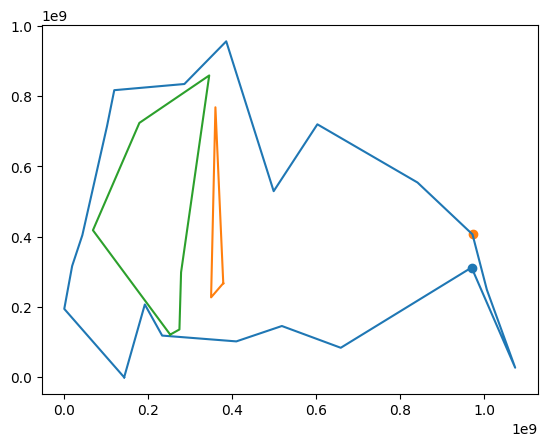

In [31]:
polygon_plt()

print(reflex.coordinate)
print("---")
for pt in FR:
    print(pt.coordinate)
print("---")

to_plot = [reflex, *FR]
# to_plot = [reflex, FR[0][0].pt1, FR[0][0].pt2]

for pt in to_plot:
    plt.scatter(pt.coordinate[0], pt.coordinate[1])

plt.show()

<bound method Fraction.as_integer_ratio of Fraction(15675485090481781837684178014654352814889859200, 26713636824419213144527687015081)>


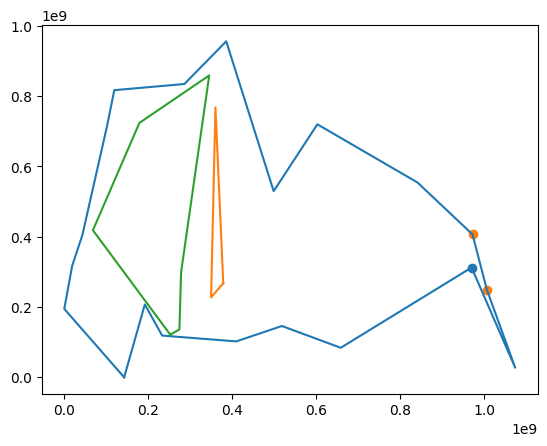

In [32]:
polygon_plt()

plt.scatter(reflex.coordinate[0], reflex.coordinate[1])

for e,d in stat_at[0]:
    # print(intersection_point(Edge(refl[1], e.pt2, None), e)[0].coordinate)
    print(d.as_integer_ratio)
    xs = [e.pt1.coordinate[0], e.pt2.coordinate[0]]
    ys = [e.pt1.coordinate[1], e.pt2.coordinate[1]]
    plt.scatter(xs,ys)

plt.show()

# Adding Edges

In [33]:
newedges = []

In [34]:
def find_point_in_list(pt):
    idx = None
    #print("To Find:", pt, pt.coordinate)
    #print("---------------------------------------")
    #for pts in poly.points:
    #    print(pts, pts.coordinate)
    #print("---------------------------------------")
    #for h in poly.holes:
        #for p in h.points:
    #        print(p, p.coordinate)
    #    print("---------------------------------------")
    #print("---------------------------------------")

    try:
        #print(poly.points.index(pt))
        idx= poly.points.index(pt)
    except:
        pass
        #print("Point not in poly.points")

    for i in range(len(poly.holes)):
        try:
            #print(poly.holes[i].points.index(pt))
            idx=poly.holes[i].points.index(pt),i
        except:
            pass
            #print("Point not in poly.holes[",i,"].points")
    #for holex in poly.holes:
    #    print(holex.points.index(pt))
    #print("----------END LOOP TRIAL-------------")
    if idx == None:
        print("OOPS, point:", pt, "Wasn't found in our list")
    return idx

#ptxx = Point(2,3,None,[], [])
#find_point_in_list(refl[1])
#For each edge to add we need to retrieve the 2 involved points, set the 2 edges correctly for both points and the polygon is updated

In [35]:
def find_points_in_list_and_add_edges_between_them(pta, ptb):
    #print("Edges before:")
    #print(len(poly.edges))
    #print(len(poly.holes[0].edges))
    #print(len(poly.holes[1].edges))

    pt = pta
    loc_a = None
    in_main_poly = False
    idx = find_point_in_list(pt)
    tuple_checker = isinstance(idx, tuple)
    #print(tuple_checker)
    if tuple_checker == False:
        #print(poly.points[idx])
        loc_a = poly.points[idx]
        in_main_poly = True
    else:
        #print(idx, idx[0], idx[1])
        #print(poly.holes[idx[1]].points[idx[0]])
        loc_a = poly.holes[idx[1]].points[idx[0]]

    #pt2 = refl[8]
    pt2 = ptb
    loc_b = None
    in_main_poly2 = False
    idx2 = find_point_in_list(pt2)
    tuple_checker2 = isinstance(idx2, tuple)
    #print(tuple_checker2)
    if tuple_checker2 == False:
        #print(poly.points[idx2])
        loc_b = poly.points[idx2]
        in_main_poly2 = True
    else:
        #print(idx2, idx2[0], idx2[1])
        #print(poly.holes[idx2[1]].points[idx2[0]])
        loc_b = poly.holes[idx2[1]].points[idx2[0]]
    
    #Creating the edges
    edge1 = Edge(loc_a, loc_b, pta.parent)
    edge2 = Edge(loc_b, loc_a, pta.parent)
    #Printing edge info
    #print(edge1, edge1.pt1, edge1.pt2, edge1.parent)
    #print(edge2, edge2.pt1, edge2.pt2, edge2.parent)
    #Adding the edges to the points' incoming and outgoing list
    #print(loc_a.incoming)
    loc_a.outgoing.append(edge1)
    loc_a.incoming.append(edge2)
    loc_b.incoming.append(edge1)
    loc_b.outgoing.append(edge2)
    #print(loc_a.incoming)

    #Adding the edges to where the edge.pt1 belongs to, if we don't need this, skip this, but I guess we would need it
    newedges.append([edge1, edge2])
    #newedges.append(edge2)
    #if in_main_poly == True:
    #    poly.edges.append(edge1)
        #print(len(poly.edges), poly.edges)
    #else:
    #    poly.holes[idx[1]].edges.append(edge1)
        #print(len(poly.holes[idx[1]].edges), poly.holes[idx[1]].edges)
    
    #if in_main_poly2 == True:
    #    poly.edges.append(edge2)
        #print(len(poly.edges),poly.edges)
    #else:
    #    poly.holes[idx[1]].edges.append(edge2)
        #print(len(poly.holes[idx[1]].edges), poly.holes[idx[1]].edges)

    #print("Edges After:")
    #print(len(newedges))
    #print(len(poly.edges))
    #print(len(poly.holes[0].edges))
    #print(len(poly.holes[1].edges))

#find_points_in_list_and_add_edges_between_them(refl[13], refl[1])

In [36]:
def insert_point_on_visible_edge(r: Point, e: Edge, polygon: Polygon):
    
    #find a point on the visible edge
    inc = r.incoming[0]

    ip = intersection_point(inc, e)[0]
    if ip is None: return ValueError("Edge was not visible; parallel")

    #delete edge from polygon
    parpoly = e.parent

    try:
        ixe = parpoly.edges.index(e)
        del parpoly.edges[ixe]
    except:
        return ValueError("Edge is not in its parent somehow")

    #insert ip into points list at the correct place
    ix = parpoly.points.index(e.pt1)
    parpoly.points.insert(ix, ip)

    #create edges
    #replacing old edge e
    split1 = Edge(e.pt1, ip, parpoly)
    split2 = Edge(ip, e.pt2, parpoly)

    #new edges to handle r
    new1 = Edge(r, ip, r.parent)
    new2 = Edge(ip, r, r.parent)

    #insert split edges into polygon
    parpoly.edges.insert(ixe, split2)
    parpoly.edges.insert(ixe, split1)

    #add new edges to the list
    newedges.append([new1, new2])

    #set incoming and outgoing for ip
    ip.incoming.extend([split1, new1])
    ip.outgoing.extend([split2, new2])
    
    return

In [52]:
reflex = refl[0]
FR, stat_at = feasible_region(reflex, poly)

#To Do: Implement full code for adding edges
# print("Len refl before:", len(refl))
pt = reflex #Here we can update our point in the list if we do all reflex points after each other
# print("To Find:", pt)
# print("In its FR:", FR)
#print(stat)
# print("----------------------")

handled = False
for item in FR:
    if item in refl:
        # print("This point is reflex!:", item)
        frp, status = feasible_region(item, poly)
        # print("FR of reflex item:", frp)
        if(pt in frp):
            # print("YES", pt, "Sees", item, "And vice versa")
            find_points_in_list_and_add_edges_between_them(pt, item)
            refl.remove(item) #Remove the reflex vertex which is matched with our i
            # print("We added edges between 2 reflex points")
            handled = True
            break;
        # else:
            # print("NOT in each other's region")
    # else:
        # print("NOT Reflex")
if handled == False and len(FR) > 0:
    # print("Bad luck, we didn't find 2 reflex vertices that saw each other")
    nr = random.randint(0, len(FR)-1)
    # print("Took randomly point from FR with index", nr, "from", len(FR), "options to connect with reflex point")
    find_points_in_list_and_add_edges_between_them(pt, FR[nr])
    
if len(FR) == 0:
    # print("FR Was empty, so we had to create a new point and update the edges")
    # TODO: Make a new point, delete old edge, add 4 new edges
    insert_point_on_visible_edge(pt, stat_at[0][0][0], poly)


refl.remove(pt) # Delete point "pt" from reflex list
# print("Len refl after:", len(refl))

EVENT QUEUE SIZE:  26
INITIAL STATUS LENGTH:  1
EVENT QUEUE SIZE:  2


ZeroDivisionError: Fraction(0, 0)

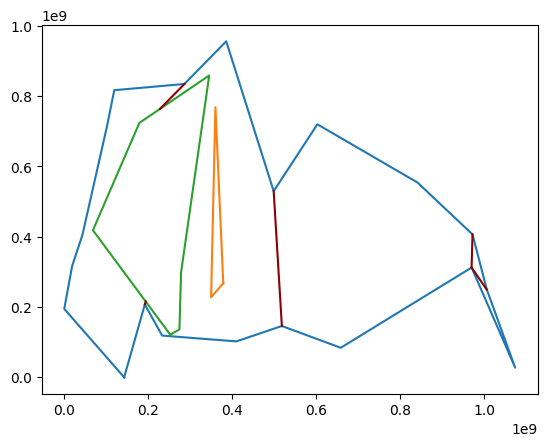

In [ ]:
polygon_plt()

for new in newedges:
    xs = [new[0].pt1.coordinate[0], new[0].pt2.coordinate[0]]
    ys = [new[0].pt1.coordinate[1], new[0].pt2.coordinate[1]]
    plt.plot(xs, ys, c='darkred')

plt.show()

# Printing JSON

In [ ]:
polygons_to_write = []
#for pp in poly.holes:
#    print(pp.points)
polygons_to_write = poly.holes #I hope you can make a list with all polygons and add those in the parameter "polygons_to_write"
#print(polygons_to_write)

#Name variables for dictionary
filename = path_to_testfile
print(filename)
leftbound = ''.join(filename).rindex('/')
rightbound = ''.join(filename).rindex('i')
#print(filename[leftbound+1:])
#print(filename[:rightbound])
print(filename[leftbound+1:rightbound-1])
instance = filename[leftbound+1:rightbound-1]
typename = "CGSHOP2023_Solution"

from decimal import Decimal

def to_float(d):
    d = Decimal(str(d)) #cast as string for proper fraction
    nom, den = d.as_integer_ratio()
    if den==1:
        #print(d)
        return d
    else:
        #print(nom, den)
        dict = {"num": nom, "den": den}
        return dict

def frac_to_dict(f):
    #print(f.numerator, f.denominator)
    dict = {"num": f.numerator, "den": f.denominator}
    return dict

lists = polygons_to_write
listsfin= []
listsdict = []

for item in lists:
    #print(item)
    for el in item.points:
        #print(el, el.coordinate, el.coordinate[0], el.coordinate[1])
        xc = el.coordinate[0]
        yc = el.coordinate[1]
        if(isinstance(xc, float)):
            xc = to_float(xc)
        if(type(xc) == Fraction):
            #print("Fraction")
            xc = frac_to_dict(xc)
        if(isinstance(yc, float)):
            yc = to_float(yc)
        if(type(yc) == Fraction):
            #print("Fraction")
            yc = frac_to_dict(yc)
        dictxy = {"x": xc, "y": yc}
        #print(dictxy)
        listsdict.append(dictxy)
    #print("NEW")
    listsfin.append(listsdict)
    #print(listsfin)
    listsdict = []

finaldict = {
    "type": typename,
    "instance": instance,
    "polygons": listsfin
}
#print(finaldict)
json_object = json.dumps(finaldict, indent=4)
with open("sol_"+instance+".json", "w") as outfile:
    outfile.write(json_object)

print("Created a json output file called:", "sol_"+instance+".json\n" , "for instance", instance,"\n", "with the following contents:\n", finaldict)
print("\nPlease use the polygons_to_write field to fill in all polygons that should be in the json file, this is now placeholded with the original holes")
        

./instances-2IMA15/instances-2IMA15/fpg-poly_0000000020_h2.instance.json
fpg-poly_0000000020_h2


TypeError: Object of type Fraction is not JSON serializable